In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CUSUM"))

from source.generator.change_point_generator import ChangePointGenerator

# Create two data streams

In [2]:
# Data Stream 1 - Sudden Shift
generator1 = ChangePointGenerator(num_segments=3, 
                                 segment_length=1000, 
                                 change_point_type='sudden_shift', 
                                 seed=2)
generator1.generate_data()
data_stream1 = generator1.get_data()

# Data Stream 2 - Sudden Shift
generator2 = ChangePointGenerator(num_segments=6,
                                 segment_length=500, 
                                 change_point_type='sudden_shift', 
                                 seed=11)
generator2.generate_data()
data_stream2 = generator2.get_data()

# List of Data Streams
list_data_streams = [data_stream1, data_stream2]

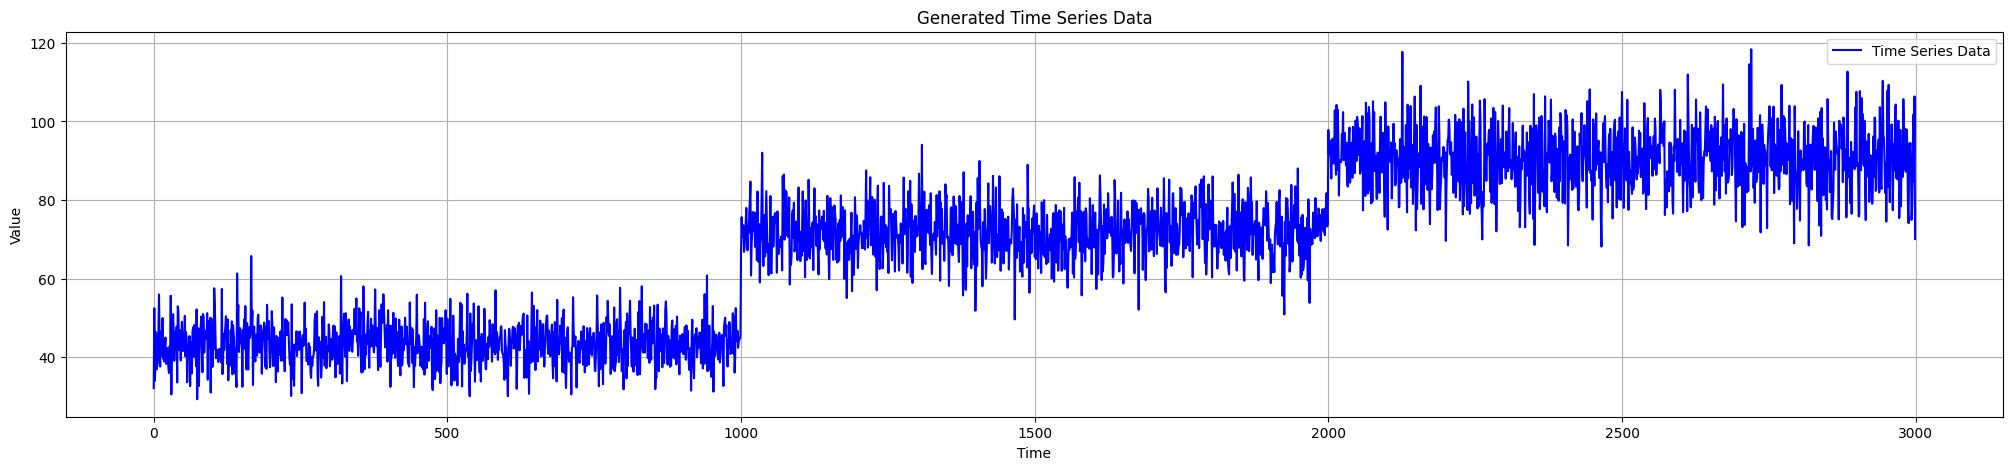

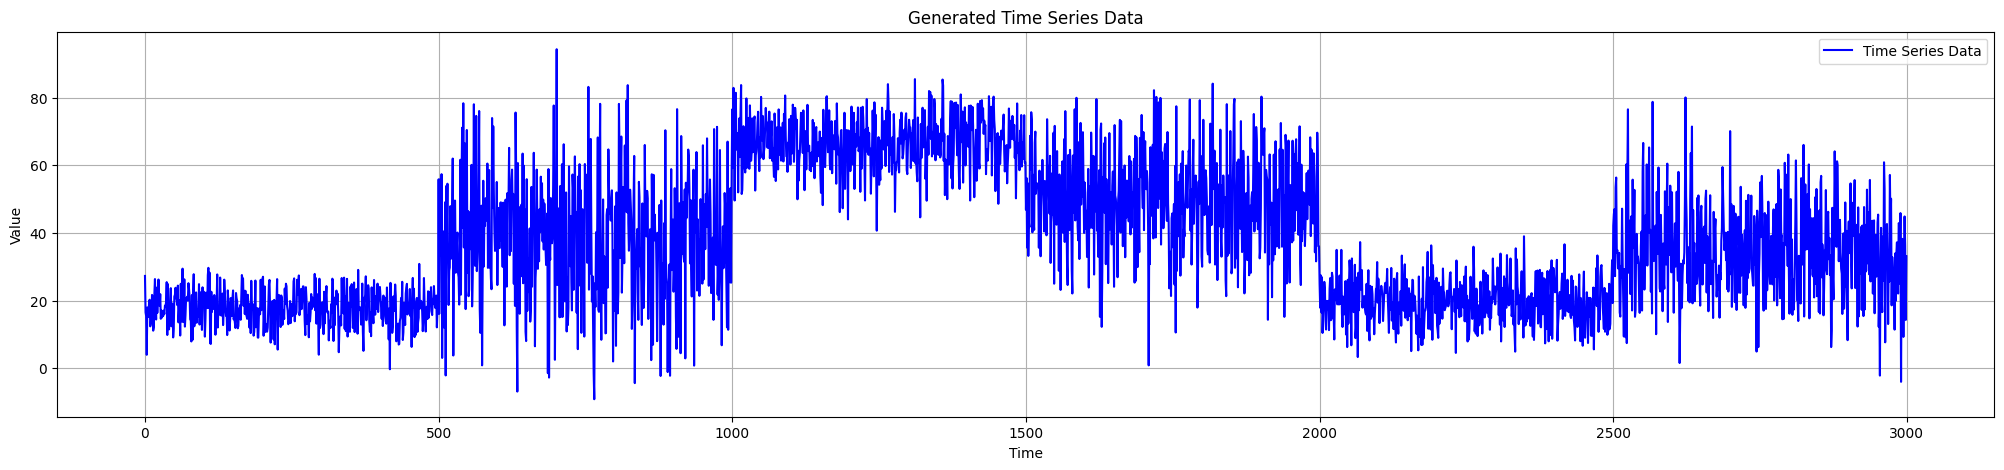

In [3]:
from source.generator.ds_generator import MultiDataStreams

dict_streams = [{"num_segments": 3,
                 "segment_length": 1000,
                 "change_point_type": "sudden_shift",
                    "seed": 2},
                {"num_segments": 6,
                    "segment_length": 500,
                    "change_point_type": "sudden_shift",
                    "seed": 11}]

many_data_streams = MultiDataStreams(dict_streams=dict_streams)
many_data_streams.generate_data_streams()
list_data_streams = many_data_streams.get_all_streams()
many_data_streams.plot_all_streams()
# save figure

In [4]:
import numpy as np

data_streams_arr = np.array(list_data_streams).T

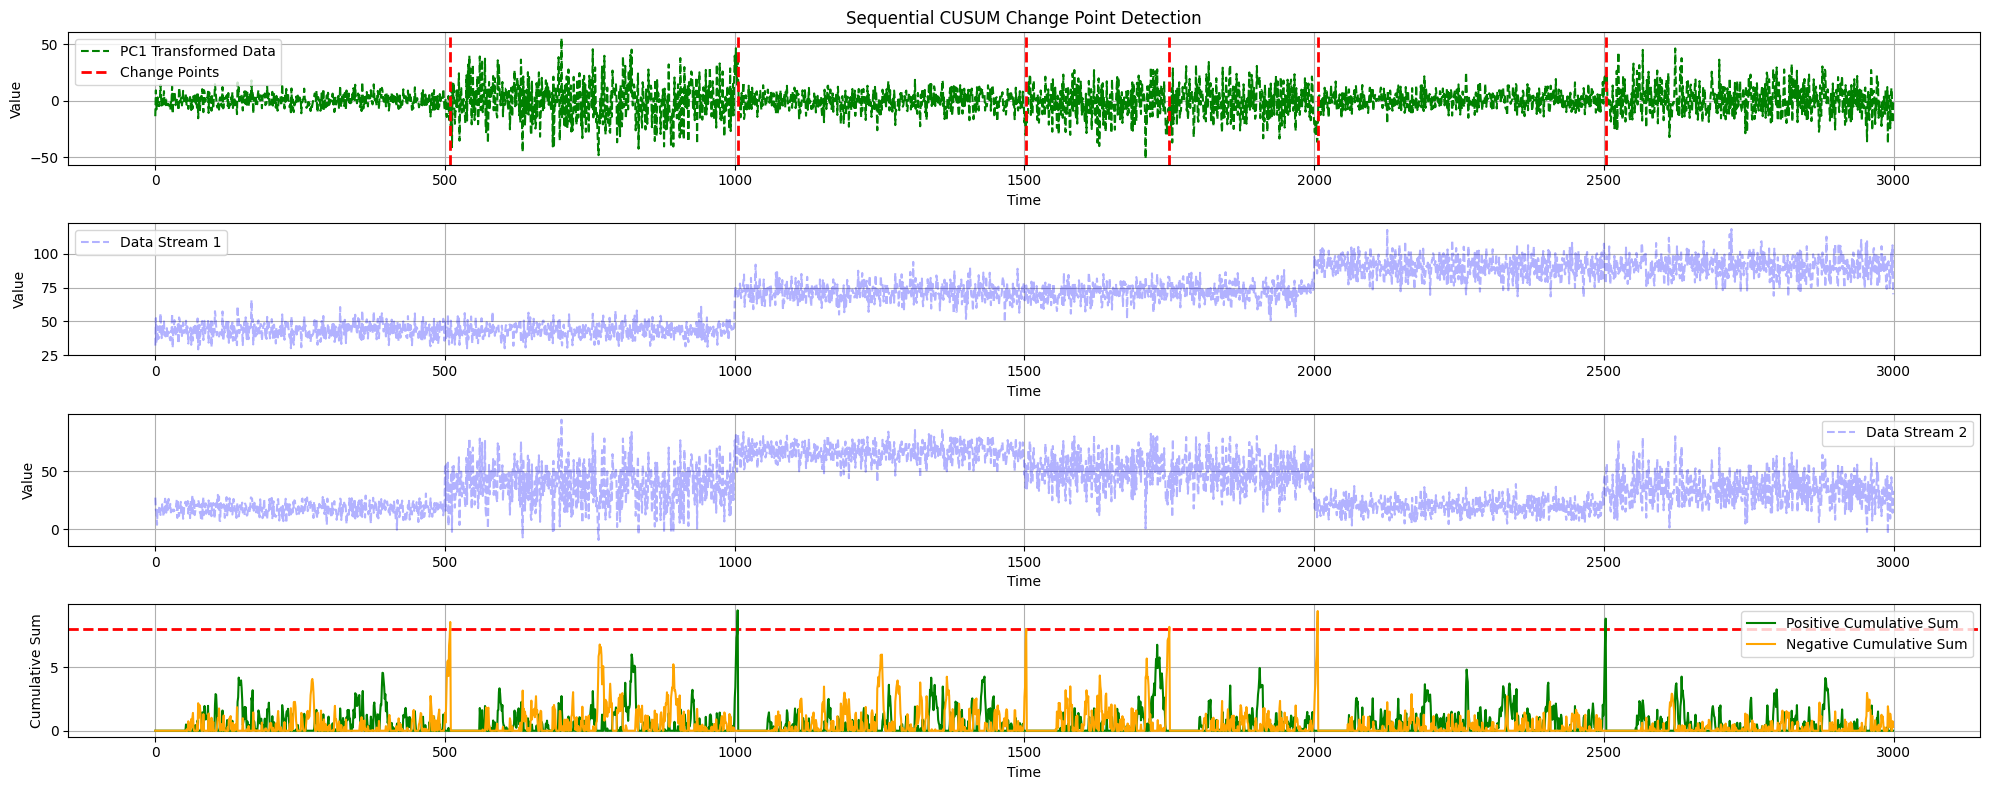

In [ ]:
from source.detector.cusum import PC1_CUSUM_Detector

# Initialize PC1-CUSUM Detector
pc1_detector = PC1_CUSUM_Detector(warmup_period=50, delta=0.5, threshold=8)
# Offline Detection
results = pc1_detector.offline_detection(data_streams_arr)
# Plot Change Points
pc1_detector.plot_change_points(data_streams=data_streams_arr,
                                    pos_changes=results['pos_changes'], 
                                    neg_changes=results['neg_changes'], 
                                    change_points=results['change_points'])